# Importing Required Libraries

In [1]:
# !pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import required models
# !pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Loading the Dataset

In [3]:
df = pd.read_csv("acetylcholinesterase_06_bioactivity_data_3class_pEC50_pubchem_fp.csv").iloc[:,1:].reset_index(drop = True)
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.196543
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.886057
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757


# Data Transformation

In [4]:
infinity_columns = df.applymap(np.isinf).any()

# Get the names of columns that contain infinity values
columns_with_infinity = infinity_columns[infinity_columns].index.tolist()
columns_with_infinity

C:\Users\ACER\AppData\Local\Temp\ipykernel_15152\3182485945.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  infinity_columns = df.applymap(np.isinf).any()


['pEC50']

In [5]:
## Removing Rows with infinity valye
rows_with_inf = df.applymap(np.isinf).any(axis = 1)
df = df[~rows_with_inf]
df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15152\3612274790.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_inf = df.applymap(np.isinf).any(axis = 1)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.196543
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.886057
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757


In [6]:
df = df.reset_index(drop = True)
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.196543
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.886057
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757


In [7]:
## Find the best model for the dataset considering a sample of data
sample = df.sample(n = int(df.shape[0]*0.25),random_state = 43)
X_sample = sample.iloc[:,:-1].reset_index(drop = True)
y_sample = sample.iloc[:,-1].reset_index(drop = True)


## Find the best performing model on the sample dataset

**The total number of columns is pretty huge. So, we will try to reduce the number of columns using PCA.**

## Calculating the best number of components for the dataset

In [8]:
## Based on above analysis
pca = PCA(n_components = 50)
pca_comps = pca.fit_transform(df.iloc[:,:-1])
df_pca = pd.DataFrame(pca_comps)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.880565,-4.117573,1.465008,1.148897,-1.960421,-0.666625,-1.101947,-0.238729,-0.537385,0.668465,...,0.030861,-0.229038,0.302646,-0.067878,-0.622457,1.305929,0.052221,-0.228025,0.587615,0.003895
1,3.184554,0.413113,-1.031779,-1.462088,2.529148,-0.527529,-0.705932,0.718381,-0.876482,-0.684819,...,0.116211,-0.443151,0.355620,0.001362,-0.004304,-0.084752,0.119074,0.174399,-0.642144,0.204612
2,-0.640102,4.291270,0.743519,2.285677,0.511900,-2.051064,0.411441,-0.250559,-0.940467,-1.331078,...,-0.902487,-0.708301,-0.289014,-0.133142,-0.192394,-0.276138,0.331320,-0.002859,0.150824,-0.286921
3,-4.822179,-0.141621,1.551146,-1.428533,1.869842,0.703298,1.132313,-1.337541,0.463104,-0.343441,...,-0.460887,-0.419955,-0.882852,0.094242,-0.363163,-0.895397,-0.040225,0.342306,0.313957,0.019903
4,2.491760,1.444058,-2.622118,2.215387,1.493140,0.069413,-1.310339,2.703503,0.514283,-1.380691,...,0.586971,1.013414,-0.042103,-0.144187,-0.057139,0.377014,-0.545868,0.115480,0.283759,-0.476907


In [9]:
df_final = pd.concat([df_pca, df.iloc[:,-1]], axis =1)

In [10]:
df_final.to_csv("./acetylcholinesterase_07PCA_bioactivity_data_3class_pEC50_pubchem_fp.csv")

# Model Development

In [11]:
df = pd.read_csv("acetylcholinesterase_07PCA_bioactivity_data_3class_pEC50_pubchem_fp.csv").reset_index(drop = True).iloc[:,1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,pEC50
0,-0.880565,-4.117573,1.465008,1.148897,-1.960421,-0.666625,-1.101947,-0.238729,-0.537385,0.668465,...,-0.229038,0.302646,-0.067878,-0.622457,1.305929,0.052221,-0.228025,0.587615,0.003895,7.196543
1,3.184554,0.413113,-1.031779,-1.462088,2.529148,-0.527529,-0.705932,0.718381,-0.876482,-0.684819,...,-0.443151,0.355620,0.001362,-0.004304,-0.084752,0.119074,0.174399,-0.642144,0.204612,4.886057
2,-0.640102,4.291270,0.743519,2.285677,0.511900,-2.051064,0.411441,-0.250559,-0.940467,-1.331078,...,-0.708301,-0.289014,-0.133142,-0.192394,-0.276138,0.331320,-0.002859,0.150824,-0.286921,5.886057
3,-4.822179,-0.141621,1.551146,-1.428533,1.869842,0.703298,1.132313,-1.337541,0.463104,-0.343441,...,-0.419955,-0.882852,0.094242,-0.363163,-0.895397,-0.040225,0.342306,0.313957,0.019903,7.200659
4,2.491760,1.444058,-2.622118,2.215387,1.493140,0.069413,-1.310339,2.703503,0.514283,-1.380691,...,1.013414,-0.042103,-0.144187,-0.057139,0.377014,-0.545868,0.115480,0.283759,-0.476907,8.045757


In [12]:
## Splitting the data for training and testing
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 43)
X_train.shape

(3095, 50)

In [13]:
## Initalizing the Model
model = RandomForestRegressor(max_depth = 20, 
                              min_samples_leaf = 3,
                              n_estimators = 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Testing Model Performance

In [14]:
residuals = y_pred - y_test

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"r2 score: {r2_score(y_test, y_pred)}\nmse: {mean_squared_error(y_test, y_pred)}")

r2 score: 0.5464933504321368
mse: 1.568502988923212


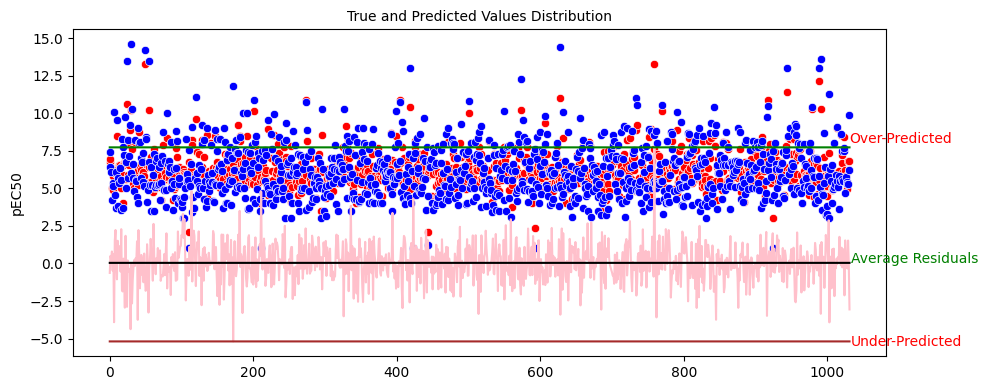

In [16]:
plt.figure(figsize = (10,4))
sns.scatterplot(x = range(len(y_pred)), y = y_pred, color = "red")
sns.scatterplot(x = range(len(y_test)), y = y_test, color = "blue")
sns.lineplot(x = range(len(y_test)), y = residuals, color = "pink")
sns.lineplot(x = range(len(y_test)), y = [residuals.max()]*len(y_test),color = "green")
sns.lineplot(x = range(len(y_test)), y = [residuals.min()]*len(y_test),color = "brown")
sns.lineplot(x = range(len(y_test)), y = [residuals.median()]*len(y_test),color = "black")
plt.title("True and Predicted Values Distribution", fontsize = 10)
plt.text(x = 1030, y = 8, s = "Over-Predicted", color = "red")
plt.text(x = 1033, y = -5.5, s = "Under-Predicted", color = "red")
plt.text(x = 1033, y = 0, s = "Average Residuals", color = "green")
plt.tight_layout()
plt.show()

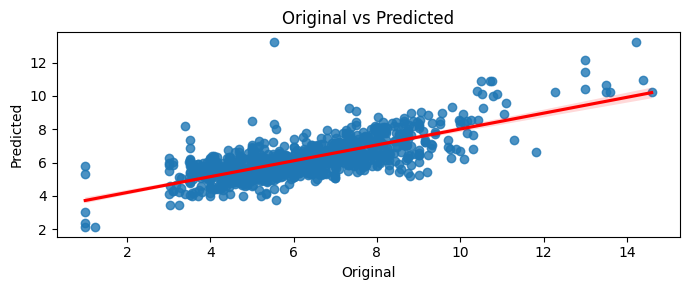

In [26]:
plt.figure(figsize = (7,3))
sns.regplot(x = y_test, y = y_pred, line_kws = {"color":"red"})
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.title("Original vs Predicted")
plt.tight_layout()
plt.show()

In [20]:
## Saving the model
import pickle
pickle.dump(obj = model, file = open("./predictor.pkl", "wb"))

In [27]:
## Saving pca
pickle.dump(obj = pca, file = open("./pca.pkl", "wb"))

In [28]:
pickle.load(file = open("./predictor.pkl", "rb"))

RandomForestRegressor(max_depth=20, min_samples_leaf=3)

# Streamlit Implementation

In [14]:
# import pickle
# import streamlit as st
# from PIL import Image
# from typing import List
# from moleculeprocessor import MoleculeProcessor
# import subprocess
# import base64
# import os
# import pandas as pd
# import numpy as np

# def filedownload(df):
#     csv = df.to_csv(index = False)
#     b64 = base64.b64encode(csv.encode()).decode()
#     href = f'<a href = "data:file/csv;base64,{b64}" download = "predictions.csv">Download csv File</a>'
#     return href

# def predictor(input_data:pd.DataFrame):
#     predictions = pickle.load(file = open("./predictor.pkl", "rb")).predict(input_data)
#     st.header("**Prediction Output**")
#     final_prediction = pd.concat([pd.Series(load_data[1],name = "Molecule Name"),
#                                  pd.Series(predictions, name  = "Predicted pEC50")])
#     st.write(final_prediction)
#     st.markdown(filedownload(final_prediction), unsafe_allow_html = True)

# ## Image
# image = Image.open("logo.png")
# st.image(image, use_column_width = True)

# ## Page title
# st.markdown("""
# # Bioactivity Prediction App

# This activity allows the user to predict the bioactivity towards inhibiting the
# Acetylcholinesterase Enzyme.
# """)



# ## Including a sidebar

# with st.sidebar.header("Upload Your CSV Data"):
#     uploaded_file = st.file_uploader(label = "Upload your input file",type = ['txt'])
#     st.sidebar.markdown("""
#     [Example Input File]("./example_file.txt")
#     """)

# ## Prediction
# if st.sidebar.button("Predict"):
#     load_data = pd.read_table(uploaded_file, sep = " ",header = None, names = ["Chembl ID", "Smiles"])
#     st.header("**Original Input Data**")
#     st.write(load_data)

#     with st.spinner("Calculating Fingerprint..."):
#         ## Fingerprint Calculation
#         processor = MoleculeProcessor()
#         fingerprint = processor.process_smile(load_data["Smiles"].values)
#         ## Checking if infinity present in any row
#         rows_with_inf = fingerprint.applymap(np.isinf).any(axis = 1)
#         final_fingerprint = fingerprint[~rows_with_inf]
#         final_fingerprint.to_csv("./pubchem.csv", index = False)

#     ## Display the calculated descriptor
#     st.header('**Calculated Molecular Descriptor**')
#     desc = pd.read_csv("./pubchem.csv")
#     st.write(desc)
#     st.write(desc.shape)
    

#     ## Apply PCA for dimensionality reduction
#     pca_fingerprint = pd.DataFrame(pickle.load(open("./pca.pkl", "rb")).transform(final_fingerprint))
#     pca_fingerprint.to_csv("./pca_descriptors.csv", index = False)
    
#     st.header("**Descriptors after dimensionality reduction**")
#     desc = pd.read_csv("./pca_descriptors.csv")
#     st.write(desc)
#     st.write(desc.shape)

#     predictor(desc)

# else:
#     st.info("Upload Input Data!!!")